In [1]:
from __future__ import division, print_function
import os
import sys
path = "/Users/adrian/projects/ophiuchus/build/lib.macosx-10.5-x86_64-2.7/"
if path not in sys.path:
    sys.path.append(path)
    
# Third-party
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline

# Custom
import gary.dynamics as gd
import gary.integrate as gi
import gary.potential as gp
from gary.units import galactic

import ophiuchus.potential as op

plotpath = "/Users/adrian/projects/ophiuchus-paper/figures/"
if not os.path.exists(plotpath):
    os.mkdir(plotpath)

In [2]:
potential_classes = dict(
    spheroid=gp.HernquistPotential,
    disk=gp.MiyamotoNagaiPotential,
    halo=gp.FlattenedNFWPotential,
    bar=op.WangZhaoBarPotential
)

# m_disk = 5E10
# m_bar = 1.8E10 / 1.15
# m_bulge = 0.
# v_c = 0.19
# potential = op.OphiuchusPotential(spheroid=dict(m=m_bulge, c=0.1),
#                                   disk=dict(m=m_disk, a=3., b=0.28),
#                                   halo=dict(v_c=v_c, r_s=30., q_z=0.9),
#                                   bar=dict(m=m_bar, r_s=1., alpha=0.))

potential = op.OphiuchusPotential()

potentials = dict()
for k,P in potential_classes.items():
    potentials[k] = P(units=galactic, **potential.parameters[k])

In [3]:
(0.19*u.kpc/u.Myr).to(u.km/u.s)

<Quantity 185.7805221178944 km / s>

---

In [4]:
ngrid = 128
grid = np.linspace(-15,15,ngrid)
xyz = np.vstack(map(np.ravel, np.meshgrid(grid,grid,grid))).T

val = np.zeros((ngrid*ngrid*ngrid,))
for k in potentials.keys():
    val += potentials[k].density(xyz)
# val += potentials['halo'].density(xyz)
val[np.isnan(val)] = val[np.isfinite(val)].max()

(-15.0, 15.0)

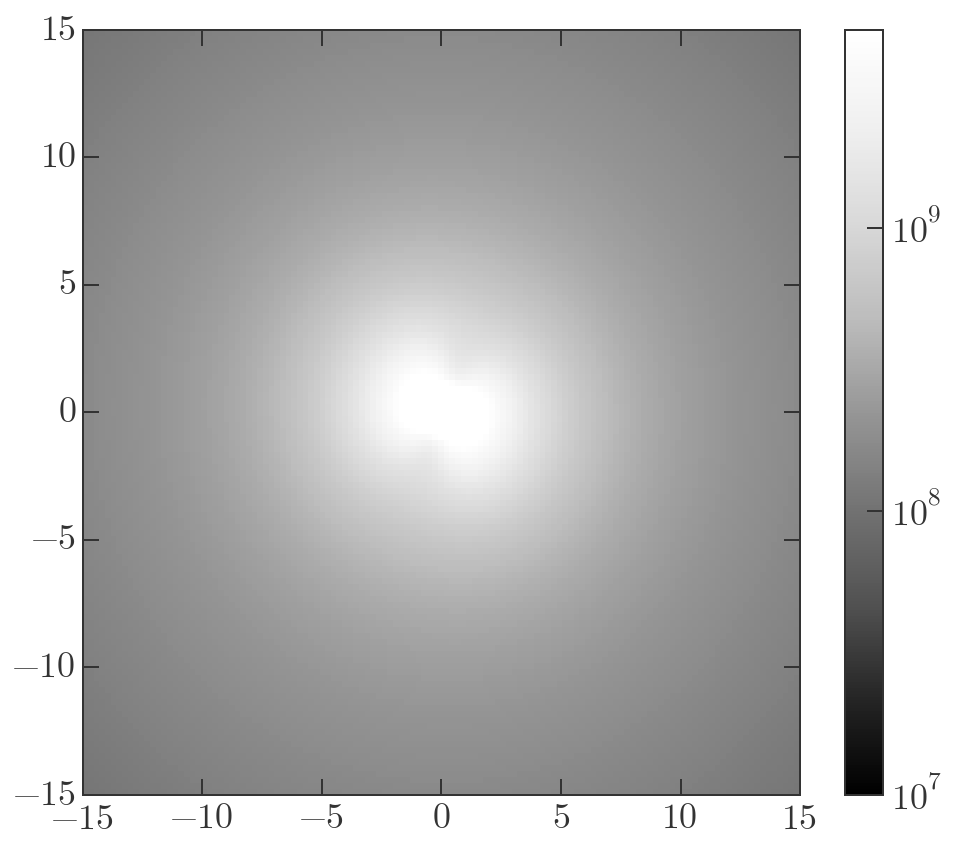

In [5]:
pl.figure(figsize=(7,6))
pl.pcolormesh(xyz[:,0].reshape(ngrid,ngrid,ngrid)[:,:,0],
              xyz[:,1].reshape(ngrid,ngrid,ngrid)[:,:,0],
              val.reshape(ngrid,ngrid,ngrid).sum(axis=2), 
              cmap='Greys_r',
              norm=mpl.colors.LogNorm(),
              vmin=1E7, vmax=5E9)
pl.colorbar()
pl.tight_layout()
pl.xlim(grid.min(), grid.max())
pl.ylim(grid.min(), grid.max())

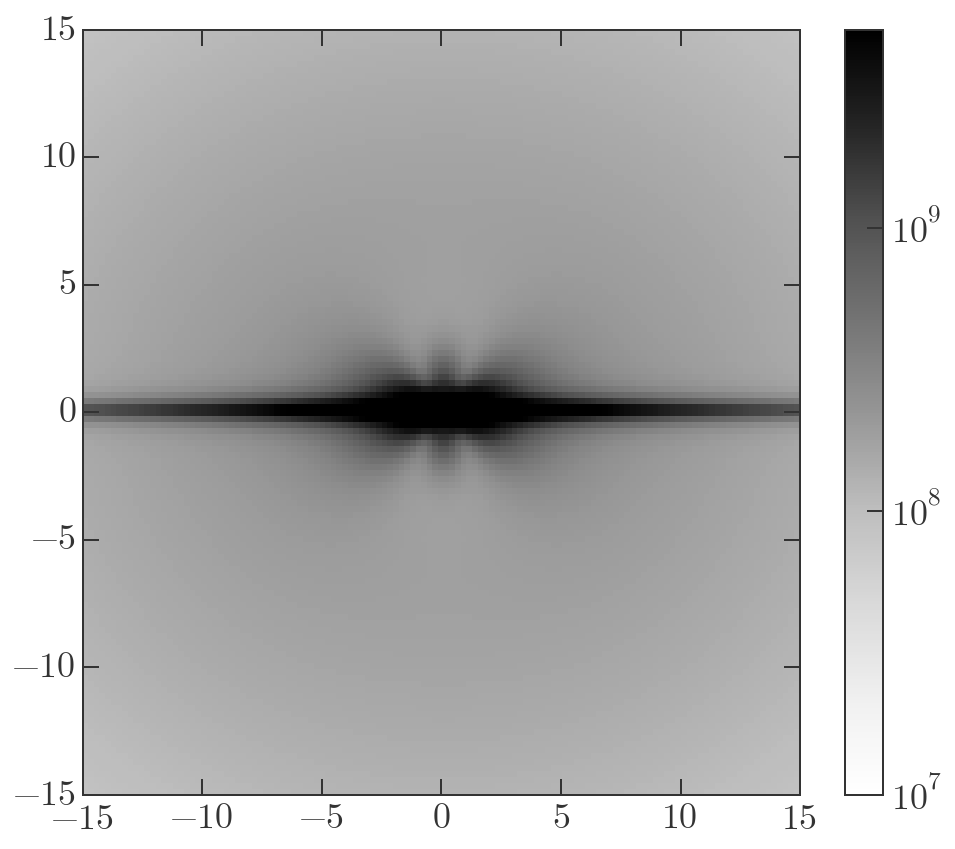

In [6]:
pl.figure(figsize=(7,6))
pl.pcolormesh(xyz[:,0].reshape(ngrid,ngrid,ngrid)[:,:,0],
              xyz[:,1].reshape(ngrid,ngrid,ngrid)[:,:,0],
              val.reshape(ngrid,ngrid,ngrid).sum(axis=0).T, 
              cmap='Greys',
              norm=mpl.colors.LogNorm(),
              vmin=1E7, vmax=5E9)
pl.xlim(grid.min(), grid.max())
pl.ylim(grid.min(), grid.max())
pl.colorbar()
pl.tight_layout()

TODO: maybe plot contours?

(-15.0, 15.0)

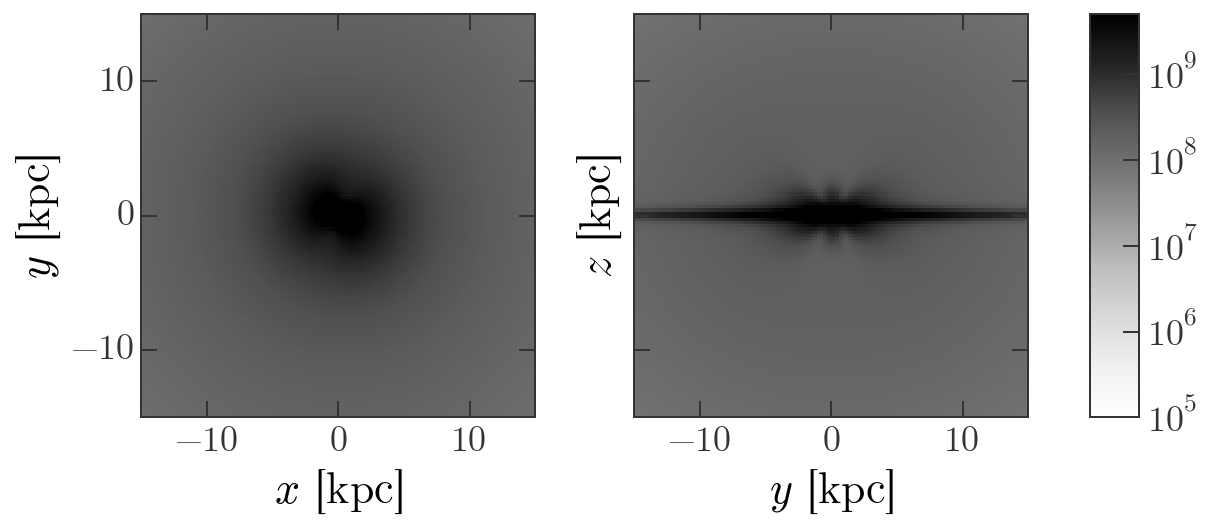

In [7]:
fig,axes = pl.subplots(1,2,figsize=(8.5,4),sharex=True,sharey=True)

# vmin,vmax = (1E8, 5E10)
vmin,vmax = (1E5, 5E9)

im = axes[0].pcolormesh(xyz[:,0].reshape(ngrid,ngrid,ngrid)[:,:,0],
                        xyz[:,1].reshape(ngrid,ngrid,ngrid)[:,:,0],
                        val.reshape(ngrid,ngrid,ngrid).sum(axis=2), 
                        cmap='Greys',
                        norm=mpl.colors.LogNorm(),
                        vmin=vmin, vmax=vmax, rasterized=True)

_ = axes[1].pcolormesh(xyz[:,0].reshape(ngrid,ngrid,ngrid)[:,:,0],
                       xyz[:,1].reshape(ngrid,ngrid,ngrid)[:,:,0],
                       val.reshape(ngrid,ngrid,ngrid).sum(axis=0).T, 
                       cmap='Greys',
                       norm=mpl.colors.LogNorm(),
                       vmin=vmin, vmax=vmax, rasterized=True)


fig.subplots_adjust(bottom=0.2, right=0.85, wspace=0.25)
cbar_ax = fig.add_axes([0.9, 0.2, 0.04, 0.7])
fig.colorbar(im, cax=cbar_ax)

for ax in axes:
    ax.xaxis.set_ticks([-10,0,10])
    ax.yaxis.set_ticks([-10,0,10])

axes[0].set_xlabel("$x$ [kpc]")
axes[0].set_ylabel("$y$ [kpc]")
axes[1].set_xlabel("$y$ [kpc]")
axes[1].set_ylabel("$z$ [kpc]")
    
axes[0].set_xlim(grid.min(), grid.max())
axes[0].set_ylim(grid.min(), grid.max())

# fig.savefig(os.path.join(plotpath, "surface-density.pdf"))
# fig.savefig(os.path.join(plotpath, "surface-density.png"), dpi=400)

In [8]:
np.arange(8,11,0.5)

array([  8. ,   8.5,   9. ,   9.5,  10. ,  10.5])

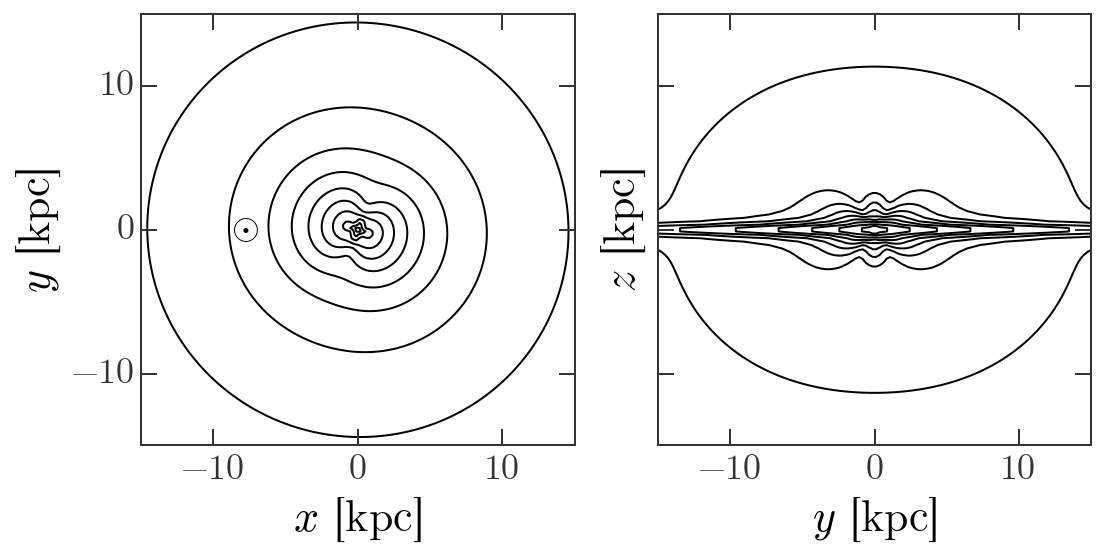

In [19]:
fig,axes = pl.subplots(1,2,figsize=(7.8,4),sharex=True,sharey=True)

im = axes[0].contour(xyz[:,0].reshape(ngrid,ngrid,ngrid)[:,:,0],
                     xyz[:,1].reshape(ngrid,ngrid,ngrid)[:,:,0],
                     val.reshape(ngrid,ngrid,ngrid).sum(axis=2), 
                     colors='k',
                     levels=10**np.arange(7,12,0.25),
                     rasterized=True)
axes[0].text(-8., 0, r"$\odot$", ha='center', va='center', fontsize=18)

_ = axes[1].contour(xyz[:,0].reshape(ngrid,ngrid,ngrid)[:,:,0],
                    xyz[:,1].reshape(ngrid,ngrid,ngrid)[:,:,0],
                    val.reshape(ngrid,ngrid,ngrid).sum(axis=0).T, 
                    colors='k',
                    levels=10**np.arange(7,12,0.3),
                    rasterized=True)


# fig.subplots_adjust(bottom=0.2, right=0.85, wspace=0.25)

for ax in axes:
    ax.xaxis.set_ticks([-10,0,10])
    ax.yaxis.set_ticks([-10,0,10])

axes[0].set_xlabel("$x$ [kpc]")
axes[0].set_ylabel("$y$ [kpc]")
axes[1].set_xlabel("$y$ [kpc]")
axes[1].set_ylabel("$z$ [kpc]")
    
axes[0].set_xlim(grid.min(), grid.max())
axes[0].set_ylim(grid.min(), grid.max())

fig.tight_layout()

# fig.savefig(os.path.join(plotpath, "surface-density-contour.pdf"), bbox_inches='tight')
# fig.savefig(os.path.join(plotpath, "surface-density-contour.png"), dpi=400, bbox_inches='tight')

In [40]:
# pl.figure(figsize=(6,3))
# pl.pcolormesh(xyz[:,0].reshape(ngrid,ngrid,ngrid)[:,:,0],
#               xyz[:,1].reshape(ngrid,ngrid,ngrid)[:,:,0],
#               val.reshape(ngrid,ngrid,ngrid).sum(axis=0).T, 
#               cmap='Greys_r',
#               norm=mpl.colors.LogNorm(),
#               vmin=5E8, vmax=5E10)
# pl.xlim(-5,5)
# pl.ylim(-2,2)
# pl.colorbar()
# pl.tight_layout()

## Portail et al. (2015)

In [31]:
ngrid = 65
grid = np.linspace(-2,2,ngrid)
xyz = np.vstack(map(np.ravel, np.meshgrid(grid,grid,grid))).T

val2 = np.zeros((ngrid*ngrid*ngrid,))
# for k in potentials.keys():
#     val += potentials[k].density(xyz)
val2 += potentials['bar'].density(xyz)
val2[np.isnan(val2)] = val2[np.isfinite(val2)].max()

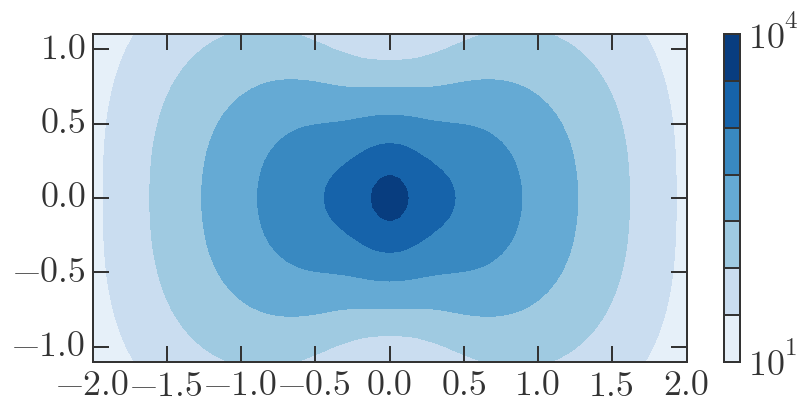

In [32]:
surf_dens = (val2.reshape(ngrid,ngrid,ngrid).sum(axis=1).T*u.Msun/(u.kpc**2)/ngrid).to(u.Msun/u.pc**2)

pl.figure(figsize=(6,3))
pl.contourf(xyz[:,0].reshape(ngrid,ngrid,ngrid)[:,:,0],
            xyz[:,1].reshape(ngrid,ngrid,ngrid)[:,:,0],
            surf_dens.value,
            norm=mpl.colors.LogNorm(),
            levels=np.logspace(1., 4, 8),
            cmap='Blues')
#               cmap='Greys_r',
#               norm=mpl.colors.LogNorm(),
#               vmin=5E8, vmax=5E10)
pl.xlim(-2,2)
pl.ylim(-1.1,1.1)
pl.colorbar()
pl.tight_layout()

## Circular velocity curve

In [43]:
def circ_vel_plot(potential):
    rr = np.linspace(0.1, 20., 1024)
    xyz = np.zeros((len(rr), 3))
    xyz[:,0] = rr
    
    potentials = dict()
    for k,P in potential_classes.items():
        potentials[k] = P(units=galactic, **potential.parameters[k])

    # vcirc = (np.sqrt(potential.G * potential.mass_enclosed(xyz) / rr)*u.kpc/u.Myr).to(u.km/u.s).value
    vcirc = (np.sqrt(potential.G * np.sum([p.mass_enclosed(xyz) for p in potentials.values()], axis=0) / rr)*u.kpc/u.Myr).to(u.km/u.s).value

    fig,ax = pl.subplots(1,1,figsize=(6,5))
    ax.plot(rr, vcirc, marker=None, lw=3.)

    styles = dict(
        halo=dict(lw=2, ls='-.'),
        bar=dict(lw=3., ls=':'),
        spheroid=dict(lw=3., ls=':'),
        disk=dict(lw=2., ls='--')
    )
    for k,p in potentials.items():
#         if k == 'spheroid':
        if k != 'halo' and potential.parameters[k]['m'] == 0:
            continue
        
        if k == 'spheroid':
            disk_other = 'Spher'
        elif k =='bar':
            disk_other = 'Bar'

        vc = (np.sqrt(potential.G * p.mass_enclosed(xyz) / rr)*u.kpc/u.Myr).to(u.km/u.s).value
        ax.plot(rr, vc, marker=None, label=k.capitalize(), **styles[k])
    
    if disk_other == 'Bar':
        vc = (np.sqrt(potential.G * (potentials['bar'].mass_enclosed(xyz)+potentials['disk'].mass_enclosed(xyz)) / rr)*u.kpc/u.Myr).to(u.km/u.s).value
    elif disk_other == 'Spher':
        vc = (np.sqrt(potential.G * (potentials['spheroid'].mass_enclosed(xyz)+potentials['disk'].mass_enclosed(xyz)) / rr)*u.kpc/u.Myr).to(u.km/u.s).value
    ax.plot(rr, vc, marker=None, label='Disk+{}'.format(disk_other), lw=2.)

    ax.set_xlabel("$x$ [kpc]")
    ax.set_ylabel(r"$v_c$ [${\rm km}\,{\rm s}^{-1}$]")

    ax.legend(loc='lower right', fontsize=14)
    ax.set_ylim(0,300)
    # ax.set_ylim(150,300)
    # ax.axhline(220, alpha=0.2, lw=1.)
    # ax.axvline(8., color='#cccccc', lw=2., zorder=-100)

    rcolor = '#dddddd'
    rect = mpl.patches.Rectangle((0.,215), rr.max(), 20., zorder=-100, color=rcolor)
    ax.add_patch(rect)
    rect2 = mpl.patches.Rectangle((8.,0), 0.3, ax.get_ylim()[1], zorder=-100, color=rcolor)
    ax.add_patch(rect2)

    fig.tight_layout()
    
    return fig

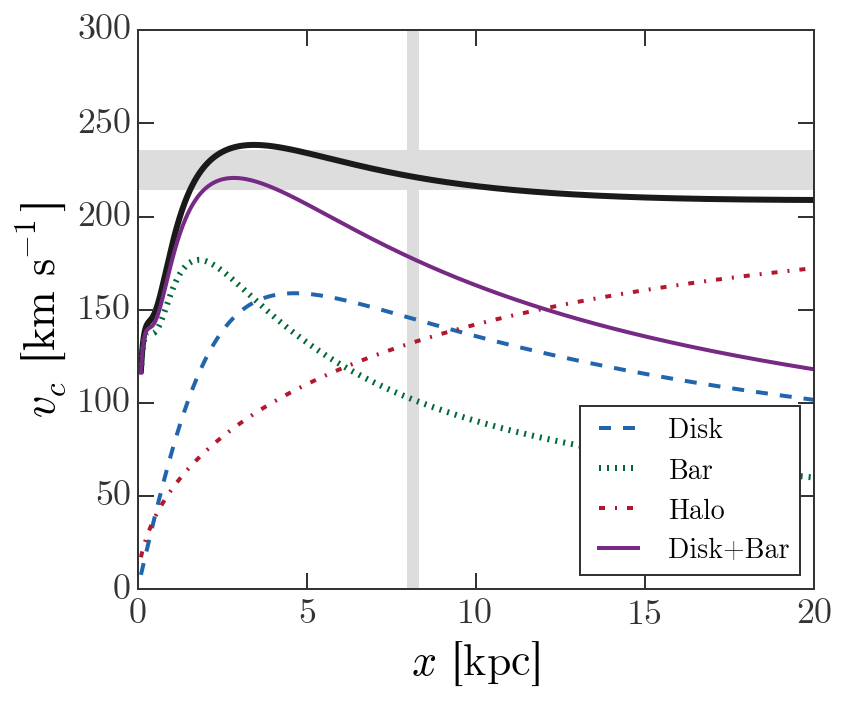

In [44]:
fig = circ_vel_plot(potential)
# fig.savefig(os.path.join(plotpath, "circ-vel.pdf"))
# fig.savefig(os.path.join(plotpath, "circ-vel.png"), dpi=400)

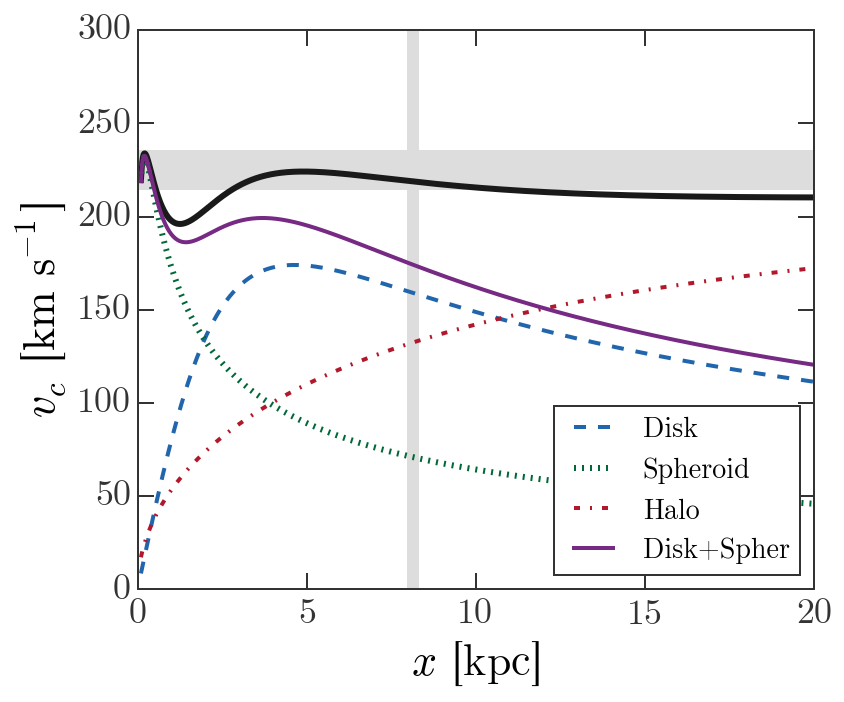

In [48]:
potential2 = op.OphiuchusPotential(bar=dict(m=0.), spheroid=dict(m=1E10, c=0.2), disk=dict(m=6.E10))
fig = circ_vel_plot(potential2)
# fig.savefig(os.path.join(plotpath, "circ-vel.pdf"))
# fig.savefig(os.path.join(plotpath, "circ-vel.png"), dpi=400)